In [63]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
#parse data 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
#label encoding on categorical data 

#FAMA 49CRSP Common Stocks 
df = pd.read_csv('ee6d2f60cdafb550.csv')
df = df.dropna()

In [64]:
import sklearn.preprocessing 
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split

#preprocessing here
#sort by date 
df = df.sort_values(by = 'public_date', ascending = True)

#encode integer categories into numbers 
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df.FFI49_desc)
print(integer_encoded)
df.FFI49_desc = integer_encoded
df.divyield_Median = [float(x.strip('%'))/100 for x in df.divyield_Median]
print(df)

#todo: https://www.gsb.stanford.edu/library/articles/databases/links/financial-ratios-suite?fbclid=IwAR0EGNGk9DdxQjEHfdaoUhdY3tNzAWDogYDzuuJi1zT_muL-uJtWQw19Fzk

#get output first 
ewlabels = df.indret_ew
vwlabels = df.indret_vw

#3year on year change as a prediction feature, raw pct change 
yoythree = ewlabels.diff(periods = 3)
#3 years rolling percent change, averaged ie. (y1-y2 + (y3-y2)change)/2 
rollavgpct = ewlabels.rolling(3).mean()

#drop first 3 years
df = df.iloc[3:]
ewlabels = ewlabels.iloc[3:]
yoythree = yoythree.iloc[3:]
#yoypctthree = yoypctthree.iloc[3:]
rollavgpct = rollavgpct.iloc[3:]

#add -1 and 1 so the bins will take on bins to be equal and set to max -1 and 1
extrema = pd.Series([-1,1])
ewnlabels = ewlabels.append(extrema)

#make a new output (bucket by percentage?)
enc = KBinsDiscretizer(n_bins=8, encode='ordinal',strategy = 'uniform')
ewnlabels = np.asarray(ewnlabels)
ewnlabels = ewnlabels.reshape((-1,1))
labels_binned = enc.fit_transform(ewnlabels)

labels_binned = labels_binned[:-2]

#1 Split-Timer series data, 0.64 Train, 0.16 dev, 0.2 Test
x_train, x_test, y_train, y_test = train_test_split(df, labels_binned, test_size = 0.2, shuffle = False)
#x_train, x_test, y_train, y_test = train_test_split(df, ewnlabels, test_size = 0.2, shuffle = False)
x_tra, x_dev, y_tra, y_dev = train_test_split(x_train, y_train, test_size = 0.2, shuffle = False)

[25 25 25 ... 22 10 47]
       public_date  FFI49_desc  NFIRM  indret_ew  indret_vw  dpr_Median  \
12337     19930831          25      6   0.052904   0.068678       0.460   
12383     19930930          25      6  -0.035253  -0.046242       0.460   
12430     19931031          25      6   0.009319  -0.018318       0.460   
12477     19931130          25      5  -0.022123  -0.014000       0.479   
12524     19931231          25      5   0.096039   0.072342       0.479   
12571     19940131          25      5   0.043779   0.009888       0.479   
12618     19940228          25      6   0.012589   0.039537       0.394   
12665     19940331          25      6  -0.012399  -0.052069       0.394   
12712     19940430          25      6  -0.026779  -0.024747       0.394   
12759     19940531          25      6  -0.001201   0.023906       0.394   
12806     19940630          25      6  -0.001294  -0.037881       0.394   
12853     19940731          25      6   0.023423   0.043118       0.394   
1

In [65]:
print(x_tra)

       public_date  FFI49_desc  NFIRM  indret_ew  indret_vw  dpr_Median  \
12477     19931130          25      5  -0.022123  -0.014000       0.479   
12524     19931231          25      5   0.096039   0.072342       0.479   
12571     19940131          25      5   0.043779   0.009888       0.479   
12618     19940228          25      6   0.012589   0.039537       0.394   
12665     19940331          25      6  -0.012399  -0.052069       0.394   
12712     19940430          25      6  -0.026779  -0.024747       0.394   
12759     19940531          25      6  -0.001201   0.023906       0.394   
12806     19940630          25      6  -0.001294  -0.037881       0.394   
12853     19940731          25      6   0.023423   0.043118       0.394   
12900     19940831          25      6   0.066949   0.055253       0.398   
12947     19940930          25      6   0.004471  -0.026728       0.398   
12994     19941031          25      6  -0.044276  -0.015566       0.398   
13041     19941130       

In [66]:
#tutorial keras practice
#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/


#####IGNORE THIS!!!!!!!!
from keras.models import Sequential
from keras.layers import Dense, Activation,Softmax
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import numpy

model = Sequential()
#parameters = number of neurons, initialization method, activation function
model.add(Dense(32, input_dim=76, init = 'uniform', activation = 'relu'))
model.add(Dense(16, init = 'uniform', activation = 'relu'))
model.add(Dense(1, init = 'uniform', activation = 'sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_tra, y_tra, epochs=25, batch_size=32)


print("----------------------------------------------------------")
scores = model.evaluate(x_tra,y_tra)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")

y_devpred = model.predict(x_dev)
print("--------------------------------------------")
print(mean_squared_error(y_dev,y_devpred))

C:\Users\carol\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, input_dim=76, activation="relu", kernel_initializer="uniform")`
  
C:\Users\carol\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="relu", kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
C:\Users\carol\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  app.launch_new_instance()


Epoch 1/25
5948/5948 [==============================] - 1s 120us/step - loss: -41.0112 - acc: 0.0000e+00
Epoch 2/25
5948/5948 [==============================] - 0s 57us/step - loss: -41.0112 - acc: 0.0000e+00
Epoch 3/25
5948/5948 [==============================] - 0s 70us/step - loss: -41.0112 - acc: 0.0000e+00
Epoch 4/25
5948/5948 [==============================] - 1s 124us/step - loss: -41.0112 - acc: 0.0000e+00
Epoch 5/25
5948/5948 [==============================] - 1s 106us/step - loss: -41.0112 - acc: 0.0000e+00
Epoch 6/25
5948/5948 [==============================] - 1s 122us/step - loss: -41.0112 - acc: 0.0000e+00
Epoch 7/25
5948/5948 [==============================] - 1s 87us/step - loss: -41.0112 - acc: 0.0000e+00
Epoch 8/25
5948/5948 [==============================] - 0s 55us/step - loss: -41.0112 - acc: 0.0000e+00
Epoch 9/25
5948/5948 [==============================] - 1s 93us/step - loss: -41.0112 - acc: 0.0000e+00
Epoch 10/25
5948/5948 [==============================] - 1s 

Epoch 1/25
5948/5948 [==============================] - 2s 282us/step - loss: 23263.0275 - mean_squared_error: 23263.0275 - mean_absolute_error: 35.1115 - mean_absolute_percentage_error: 1009.8479 - cosine_proximity: -0.6449
Epoch 2/25
5948/5948 [==============================] - 1s 110us/step - loss: 0.3893 - mean_squared_error: 0.3893 - mean_absolute_error: 0.5268 - mean_absolute_percentage_error: 15.3620 - cosine_proximity: -1.0000
Epoch 3/25
5948/5948 [==============================] - 1s 120us/step - loss: 0.4579 - mean_squared_error: 0.4579 - mean_absolute_error: 0.5618 - mean_absolute_percentage_error: 16.3736 - cosine_proximity: -1.0000
Epoch 4/25
5948/5948 [==============================] - ETA: 0s - loss: 0.6201 - mean_squared_error: 0.6201 - mean_absolute_error: 0.6423 - mean_absolute_percentage_error: 18.6157 - cosine_proximity: -1.00 - 1s 134us/step - loss: 0.6225 - mean_squared_error: 0.6225 - mean_absolute_error: 0.6427 - mean_absolute_percentage_error: 18.6537 - cosine_

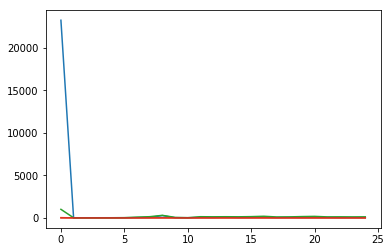

----------------------------------------------------------
1487/1487 [==============================] - 1s 369us/step


TypeError: 'type' object is not subscriptable

In [67]:
#Regression Model:
#1 Layer: 76 -> 12.78% and 15.28%
#2 Layer: 76,1 -> 0.40% and 0.48%
#3 Layers: 76, 32, 1 -> 0% and 65%
#4 layers: 76,48,32,1 + adam +  -> 60.52% and 56.70%
#4 Layers: 76,32,16,1 -> 61.33% and 57.18%
#4 Layers: 76,32,8,1 -> 0%
#4 layers: 76,48,8,1 -> 0%
#6 layers: 76,48,32,16,8,1 -> 20% and 0%

import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
import seaborn as sns


model = Sequential()
#parameters = number of neurons, initialization method, activation function
model.add(Dense(76, input_dim=76, kernel_initializer='normal', activation='relu'))
model.add(Dense(48, kernel_initializer='normal',activation = 'relu'))
model.add(Dense(32, kernel_initializer='normal',activation = 'relu'))
model.add(Dense(16, kernel_initializer='normal',activation = 'relu'))
#model.add(Dense(8, kernel_initializer='normal',activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal'))
    
# Compile model
#opt = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
#model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
history = model.fit(np.asarray(x_tra), y_tra, epochs=25)

pyplot.plot(history.history['mean_squared_error'])
pyplot.plot(history.history['mean_absolute_error'])
pyplot.plot(history.history['mean_absolute_percentage_error'])
pyplot.plot(history.history['cosine_proximity'])
pyplot.show()

print("----------------------------------------------------------")
scores = model.evaluate(np.asarray(x_dev),y_dev)
for i in range[len(scores)]:
    print("\n%s: %.2f%%" % (model.metrics_names[i], scores[i]*100))

print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
scores = model.evaluate(np.asarray(x_test),y_test)
for i in range[len(scores)]:
    print("\n%s: %.2f%%" % (model.metrics_names[i], scores[i]*100))


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
import numpy

model = Sequential()
model.add(Dense(32, input_dim=76, init = 'uniform', activation = 'relu'))
model.add(Dense(16, init = 'uniform', activation = 'relu'))
model.add(Dense(8, init = 'uniform', activation = 'softmax'))

# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=25, batch_size=32)


print("----------------------------------------------------------")
scores = model.evaluate(x_train,y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

print("XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX")
y_devpred = model.predict(x_dev)
print("--------------------------------------------")
print(mean_squared_error(y_dev,y_devpred))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Softmax
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(32, input_shape = (x_train.shape)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

model.fit(x_train, y_train, epochs=5, batch_size=32)
y_devpred = model.predict(x_dev)
print("--------------------------------------------")
print(mean_squared_error(y_dev,y_devpred))
